Assignment-**APTCODER**

Importing modules

In [146]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [147]:
data = pd.read_csv("/content/music.csv")
data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


predictor(Age, Gender) and Target variable(genre)

In [148]:
x = data.drop(columns=['genre'])
y = data['genre']

As we have to classify different genres, we are performing Cross validation with all the classification algorithms to see mean accuracy

In [149]:
randomfor = RandomForestClassifier()
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'random forest', 1: 'Logistic Regression', 2: 'Decision Tree',3:'KNN',4:'SVC',5:'Naive Bayes'}
cv_models=[randomfor,logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, x, y, cv=6, scoring ='accuracy').mean()))

random forest Test Accuracy: 0.611111111111111
Logistic Regression Test Accuracy: 0.6666666666666666
Decision Tree Test Accuracy: 0.7777777777777778
KNN Test Accuracy: 0.5
SVC Test Accuracy: 0.3333333333333333
Naive Bayes Test Accuracy: 0.0


Though the accuracy of Decison Tree comes out much more than the rest of the algorithms, still we have to check for underfitting/overfitting individually for all

In [150]:
#splitting the data into 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

**Random Forest**

In [153]:
random = RandomForestClassifier(random_state=0)
random.fit(x_train, y_train)
y_pred = random.predict(x_test)
print("Training set score: {:.4f}".format(random.score(x_train,y_train)))
print("Test set score: {:.4f}".format(random.score(x_test,y_test)))

Training set score: 1.0000
Test set score: 0.6667


The above model shows 'Overfitting'

**Decision Tree**

In [155]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Training set score: {:.4f}".format(dt.score(x_train,y_train)))
print("Test set score: {:.4f}".format(dt.score(x_test,y_test)))

Training set score: 1.0000
Test set score: 1.0000


Decision Tree 'overfitting'

**K nearest neighbors**

In [156]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Training set score: {:.4f}".format(knn.score(x_train,y_train)))
print("Test set score: {:.4f}".format(knn.score(x_test,y_test)))

Training set score: 0.5833
Test set score: 0.5000


KNN can't grasp the features of the training model very well, as it is giving poor accuracy in Train and Test both. Let's see for the next....

**Support Vector Classifier**

In [157]:
svc=SVC(random_state=0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("Training set score: {:.4f}".format(svc.score(x_train,y_train)))
print("Test set score: {:.4f}".format(svc.score(x_test,y_test)))

Training set score: 0.5000
Test set score: 0.5000


As same as KNN(almost).......

**Naive Bayes Algorithm**

In [159]:
nb=BernoulliNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("Training set score: {:.4f}".format(nb.score(x_train,y_train)))
print("Test set score: {:.4f}".format(nb.score(x_test,y_test)))

Training set score: 0.4167
Test set score: 0.1667


The accuracy of the above model is very low.....

**Logistic Regression**

In [160]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("Training set score: {:.4f}".format(logreg.score(x_train,y_train)))
print("Test set score: {:.4f}".format(logreg.score(x_test,y_test)))

Training set score: 0.9167
Test set score: 0.8333


**Well, Logistic Regression acts as a good fit for the dataset. So, we are choosing logistic Regression for model building........**

**Confusion Matrix on Test data for Logistic Regression model**

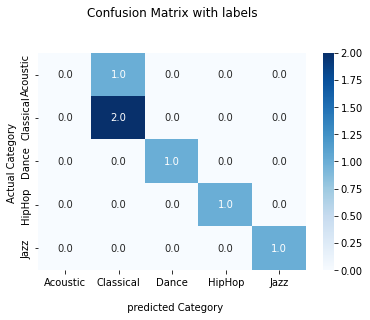

In [161]:
cm = confusion_matrix(y_test,y_pred)

##Generating heatmap to visualize the confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")

##Setting up the title and Labels
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\n  predicted Category')
ax.set_ylabel('Actual Category ');

##Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Acoustic','Classical', 'Dance', 'HipHop', 'Jazz'])
ax.yaxis.set_ticklabels(['Acoustic','Classical', 'Dance', 'HipHop', 'Jazz'])
plt.show()

**Classification Report**

In [162]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Acoustic       0.00      0.00      0.00         1
   Classical       0.67      1.00      0.80         2
       Dance       1.00      1.00      1.00         1
      HipHop       1.00      1.00      1.00         1
        Jazz       1.00      1.00      1.00         1

    accuracy                           0.83         6
   macro avg       0.73      0.80      0.76         6
weighted avg       0.72      0.83      0.77         6



**Save the model**

In [163]:
#persisting a model and saving it to a file
import joblib
joblib.dump(logreg, 'genre_prediction.joblib')

['genre_prediction.joblib']

**Prediction making.....**

In [164]:
model1 = joblib.load('genre_prediction.joblib')
predictions = model1.predict([[28,0]])
predictions[0]

'Acoustic'

**Thank You !!!**